# Import dependencies

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
data= pd.read_csv(r'D:\OneDrive\Desktop\Internship\New folder\ex1.csv')

# Data Exploration

In [34]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [57]:
data.describe()

,Hours,Scores,predicted_score
count,25.000000,25.000000,25.000000
mean,5.012000,51.480000,51.480000
std,2.525094,25.286887,24.684823
min,1.100000,17.000000,13.237057
25%,2.700000,30.000000,28.878343
50%,4.800000,47.000000,49.407530
75%,7.400000,75.000000,74.824618
max,9.200000,95.000000,92.421065


In [35]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [36]:
data.shape

(25, 2)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Correlation between columns

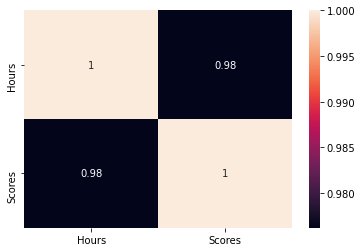

In [38]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#This heatmap tells us that there is high correlation between the two variables

In [39]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [11]:
#There is no null value

# Data Visualization

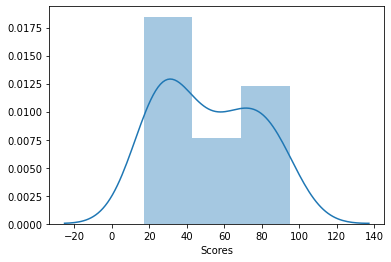

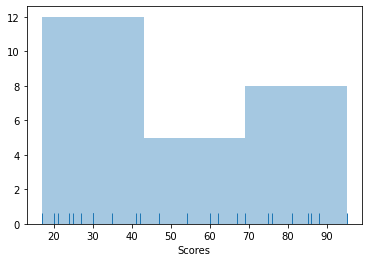

In [40]:
sns.distplot(data["Scores"])
plt.show()

sns.distplot(data["Scores"], kde=False, rug=True)
plt.show()

In [13]:
#The graph shows the variation in data distribution. 

# Joint plot

D:\dotnet\Anaconda\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


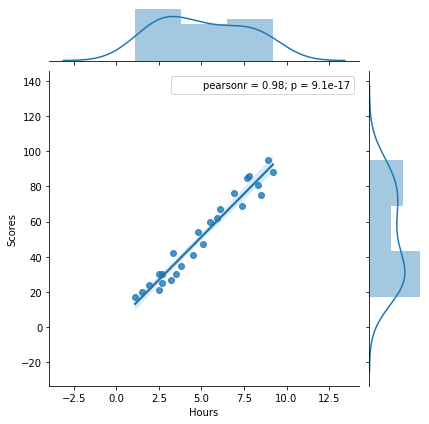

In [41]:
sns.jointplot(data["Hours"],data["Scores"], kind="reg").annotate(stats.pearsonr)
plt.show()

In [15]:
#This graph tells us that scores and hours are related with each other linearly

# Visualizing correlation

Text(0.5, 1.0, 'Regression Line')

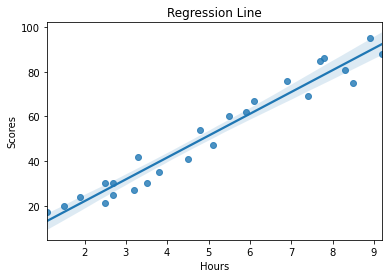

In [42]:
sns.regplot(x="Hours", y="Scores", data=data)
plt.title("Regression Line")

In [ ]:
# The regression plot tells us the correlation between scores and hours. The straight line is the predictive score whereas the 
#dots are actual scores.

# Prediction of data using simple linear regression

In [43]:
x= data.iloc[:, :-1].values
y= data.iloc[:, :-1].values
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [ ]:
#We create train and test variables. Train variables will train the model whereas the test variables will help us to test 
#our model

In [44]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicted hour values 

In [45]:
y_prediction= reg.predict(x_test)

In [46]:
y_prediction

array([[9.2],
       [4.8],
       [6.1],
       [3.8],
       [1.1],
       [5.9],
       [3.3],
       [8.3],
       [8.5]])

In [ ]:
#y_prediction gives us the predicted hour values 

# Actual v/s Predicted values

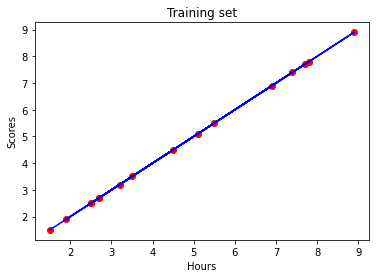

In [47]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, reg.predict(x_train), color='blue')
plt.title('Training set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#This graph contains a scatterplot as well as a line plot. The line represents the predicted values whereas the dots represent
#the actual values.

# Calculating the coefficients of simple linear regression: y= c+mx

In [48]:
mean_x=np.mean(data['Hours'])
mean_y=np.mean(data['Scores'])
num=0
den=0
x= list(data['Hours'])
y= list(data['Scores'])
for i in range(len(data)):
    num+=(x[i]-mean_x)*(y[i]-mean_y)
    den+= (x[i]-mean_x)**2
B1= num/den

In [49]:
B0= mean_y - B1*mean_x

In [50]:
data['predicted_score']=B0 + B1* data['Hours']

In [52]:
data.head(10)

,Hours,Scores,predicted_score
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


[]

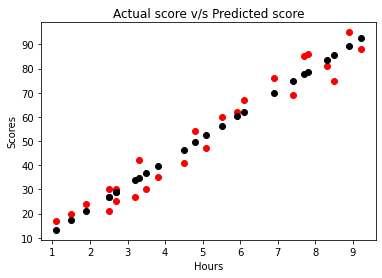

In [53]:
plt.scatter(data['Hours'], data['Scores'], c='red', label='Actual Marks')
plt.scatter(data['Hours'], data['predicted_score'], c='black', label='Predicted Marks')
plt.title('Actual score v/s Predicted score')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [ ]:
Marks of a student who study 9.25 hours a day

In [56]:
y = B0+B1*9.25
print('Marks of a student who studies 9.25 hours a data:',y)

Marks of a student who studies 9.25 hours a data: 92.90985477015732
